In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Pandas Configs

In [2]:
pd.set_option('display.precision', 2) # Only display 2 decimals

In [3]:
df = pd.read_csv("data/responses.csv")

df.head()

,Last Name,First Name,Sex,Year Level,Section,How many cups of coffee can you consume in a week?,Coffee enhances my focus and concentration during academic activities.,I find that having coffee positively impacts my overall academic performance.,Coffee is an essential part of my study routine.,I believe that having coffee enhances my creativity and problem-solving skills when working on academic tasks.,Coffee helps me stay alert during lectures and discussions.,I feel more motivated to engage in academic activities when I have coffee.,Having coffee enhances my ability to retain and recall information while studying.,Coffee is a helpful tool for managing academic stress and workload.,I believe incorporating coffee into academic activities positively impacts my overall learning experience.,Coffee plays a significant role in creating a positive and productive academic environment for me.,What is your average grade from the first semester of A.Y. 2023-24?
0,Kho,Ramil Jerome,Male,3rd Year,A,3,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,1.62
1,Hualde,Dustin Angelo,Male,3rd Year,A,6,Neutral,Neutral,Disagree,Neutral,Agree,Neutral,Neutral,Disagree,Disagree,Agree,1.79
2,Barrameda,Jerric,Male,3rd Year,B,10,Disagree,Neutral,Strongly disagree,Strongly disagree,Neutral,Agree,Strongly disagree,Agree,Disagree,Agree,1.80
3,Flores,Patrick,Male,3rd Year,A,3,Agree,Agree,Disagree,Neutral,Neutral,Agree,Neutral,Strongly agree,Agree,Agree,1.55
4,Hualde,Dustin Angelo,Male,3rd Year,A,6,Neutral,Disagree,Disagree,Disagree,Neutral,Disagree,Disagree,Agree,Disagree,Neutral,1.79


### Function for to convert final grade into GWA

In [4]:
def convert_to_gwa(final_grade):
  if final_grade >= 98:
    return 1.0
  elif final_grade >= 95:
    return 1.25
  elif final_grade >= 92:
    return 1.5
  elif final_grade >= 89:
    return 1.75
  elif final_grade >= 85:
    return 2.0
  elif final_grade >= 82:
    return 2.25
  elif final_grade >= 79:
    return 2.5
  elif final_grade >= 75:
    return 2.75
  elif final_grade >= 72:
    return 3.0
  else:
    return final_grade

### Rename columns

In [5]:
df = df.rename(columns = {
    'How many cups of coffee can you consume in a week?':'Coffee Consumed per Week',
    'Coffee enhances my focus and concentration during academic activities.':'Coffee Perception 1',
    'I find that having coffee positively impacts my overall academic performance.':'Coffee Perception 2',
    'Coffee is an essential part of my study routine.':'Coffee Perception 3',
    'I believe that having coffee enhances my creativity and problem-solving skills when working on academic tasks.':'Coffee Perception 4',
    'Coffee helps me stay alert during lectures and discussions.':'Coffee Perception 5',
    'I feel more motivated to engage in academic activities when I have coffee.':'Coffee Perception 6',
    'Having coffee enhances my ability to retain and recall information while studying.':'Coffee Perception 7',
    'Coffee is a helpful tool for managing academic stress and workload.':'Coffee Perception 8',
    'I believe incorporating coffee into academic activities positively impacts my overall learning experience.':'Coffee Perception 9',
    'Coffee plays a significant role in creating a positive and productive academic environment for me.':'Coffee Perception 10',
    'What is your average grade from the first semester of A.Y. 2023-24?':'A.Y. 2023-2024 1st Semester Average Grade'
})

df['A.Y. 2023-2024 1st Semester Average Grade'] = df['A.Y. 2023-2024 1st Semester Average Grade'].apply(convert_to_gwa)

df.head()

,Last Name,First Name,Sex,Year Level,Section,Coffee Consumed per Week,Coffee Perception 1,Coffee Perception 2,Coffee Perception 3,Coffee Perception 4,Coffee Perception 5,Coffee Perception 6,Coffee Perception 7,Coffee Perception 8,Coffee Perception 9,Coffee Perception 10,A.Y. 2023-2024 1st Semester Average Grade
0,Kho,Ramil Jerome,Male,3rd Year,A,3,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,1.62
1,Hualde,Dustin Angelo,Male,3rd Year,A,6,Neutral,Neutral,Disagree,Neutral,Agree,Neutral,Neutral,Disagree,Disagree,Agree,1.79
2,Barrameda,Jerric,Male,3rd Year,B,10,Disagree,Neutral,Strongly disagree,Strongly disagree,Neutral,Agree,Strongly disagree,Agree,Disagree,Agree,1.80
3,Flores,Patrick,Male,3rd Year,A,3,Agree,Agree,Disagree,Neutral,Neutral,Agree,Neutral,Strongly agree,Agree,Agree,1.55
4,Hualde,Dustin Angelo,Male,3rd Year,A,6,Neutral,Disagree,Disagree,Disagree,Neutral,Disagree,Disagree,Agree,Disagree,Neutral,1.79


In [6]:
replacer = {'Strongly disagree':1, 'Disagree':2, 'Neutral':3, 'Agree':4, 'Strongly agree':5, 'Male':1, 'Female':2}

perception_cols = ['Coffee Perception 1', 'Coffee Perception 2', 'Coffee Perception 3', 'Coffee Perception 4', 'Coffee Perception 5', 'Coffee Perception 6',
                   'Coffee Perception 7', 'Coffee Perception 8', 'Coffee Perception 9', 'Coffee Perception 10']

cols = df.columns[df.dtypes == 'object']

df[cols] = df[cols].replace(replacer)

df['Perception Mean'] = df[perception_cols].mean(axis=1)

df.head(10)

C:\Users\kenta\AppData\Local\Temp\ipykernel_19092\2844706415.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace(replacer)


,Last Name,First Name,Sex,Year Level,Section,Coffee Consumed per Week,Coffee Perception 1,Coffee Perception 2,Coffee Perception 3,Coffee Perception 4,Coffee Perception 5,Coffee Perception 6,Coffee Perception 7,Coffee Perception 8,Coffee Perception 9,Coffee Perception 10,A.Y. 2023-2024 1st Semester Average Grade,Perception Mean
0,Kho,Ramil Jerome,1,3rd Year,A,3,2,2,2,2,2,2,2,2,2,2,1.62,2.0
1,Hualde,Dustin Angelo,1,3rd Year,A,6,3,3,2,3,4,3,3,2,2,4,1.79,2.9
2,Barrameda,Jerric,1,3rd Year,B,10,2,3,1,1,3,4,1,4,2,4,1.80,2.5
3,Flores,Patrick,1,3rd Year,A,3,4,4,2,3,3,4,3,5,4,4,1.55,3.6
4,Hualde,Dustin Angelo,1,3rd Year,A,6,3,2,2,2,3,2,2,4,2,3,1.79,2.5
5,Jardeleza,Joshua,1,3rd Year,A,14,5,5,5,5,5,5,5,5,5,5,1.90,5.0
6,Chapito,Kanyon,2,3rd Year,B,14,4,4,4,4,4,4,4,4,4,4,1.75,4.0
7,Tan,Justin,1,3rd Year,B,5,4,4,4,3,5,4,3,4,2,3,1.73,3.6
8,Kanding,Chapsoy,1,4th Year,A,7,4,4,4,4,4,4,4,4,4,4,2.00,4.0
9,Hangaga,Kandada,1,1st Year,A,8,4,4,4,4,4,4,4,4,4,4,2.25,4.0


### Descriptives

In [7]:
df.describe()

,Sex,Coffee Consumed per Week,Coffee Perception 1,Coffee Perception 2,Coffee Perception 3,Coffee Perception 4,Coffee Perception 5,Coffee Perception 6,Coffee Perception 7,Coffee Perception 8,Coffee Perception 9,Coffee Perception 10,A.Y. 2023-2024 1st Semester Average Grade,Perception Mean
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,1.25,4.71,3.33,3.21,3.04,2.96,3.42,3.29,3.04,3.29,3.12,3.46,1.83,3.22
std,0.44,3.88,1.17,1.06,1.30,1.04,1.25,1.04,1.04,1.27,1.12,1.10,0.45,0.98
min,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.21,1.00
25%,1.00,2.00,3.00,3.00,2.00,2.75,3.00,3.00,3.00,2.75,2.00,3.00,1.52,2.88
50%,1.00,3.50,3.00,3.00,3.00,3.00,3.50,4.00,3.00,3.50,3.00,3.50,1.77,3.20
75%,1.25,6.25,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,4.00
max,2.00,14.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3.16,5.00


### Standard Errors

In [8]:
df.sem(numeric_only=True)

Sex                                          0.09
Coffee Consumed per Week                     0.79
Coffee Perception 1                          0.24
Coffee Perception 2                          0.22
Coffee Perception 3                          0.27
Coffee Perception 4                          0.21
Coffee Perception 5                          0.25
Coffee Perception 6                          0.21
Coffee Perception 7                          0.21
Coffee Perception 8                          0.26
Coffee Perception 9                          0.23
Coffee Perception 10                         0.23
A.Y. 2023-2024 1st Semester Average Grade    0.09
Perception Mean                              0.20
dtype: float64

### Skewness

In [9]:
df.skew(numeric_only=True)

Sex                                          1.23
Coffee Consumed per Week                     1.14
Coffee Perception 1                         -0.36
Coffee Perception 2                         -0.45
Coffee Perception 3                          0.05
Coffee Perception 4                         -0.41
Coffee Perception 5                         -0.60
Coffee Perception 6                         -0.90
Coffee Perception 7                         -0.59
Coffee Perception 8                         -0.46
Coffee Perception 9                         -0.27
Coffee Perception 10                        -0.63
A.Y. 2023-2024 1st Semester Average Grade    1.20
Perception Mean                             -0.66
dtype: float64

### Frequencies (Sex, Category, Course)

In [10]:
sex_count = df["Sex"].size
df_sex_count = df["Sex"].value_counts()

perc_sex = df_sex_count.apply(lambda x: x * 100 / sex_count)

pd.DataFrame({   
    "Count": df_sex_count,
    "% of Total": perc_sex,
    "% of Cumulative": perc_sex.cumsum(),
})

,Count,% of Total,% of Cumulative
Sex,,,
1,18,75.0,75.0
2,6,25.0,100.0


In [11]:
section_count = df["Section"].size
df_section_count = df["Section"].value_counts()

perc_total = df_section_count.apply(lambda x: x * 100 / section_count)
cum = perc_total.cumsum()

pd.DataFrame({
    "Count": df_section_count,
    "% of Total": perc_total,
    "% of Cummulative": cum
})

,Count,% of Total,% of Cummulative
Section,,,
A,18,75.0,75.0
B,6,25.0,100.0


### Visualization (Histogram and Desinity Curve)

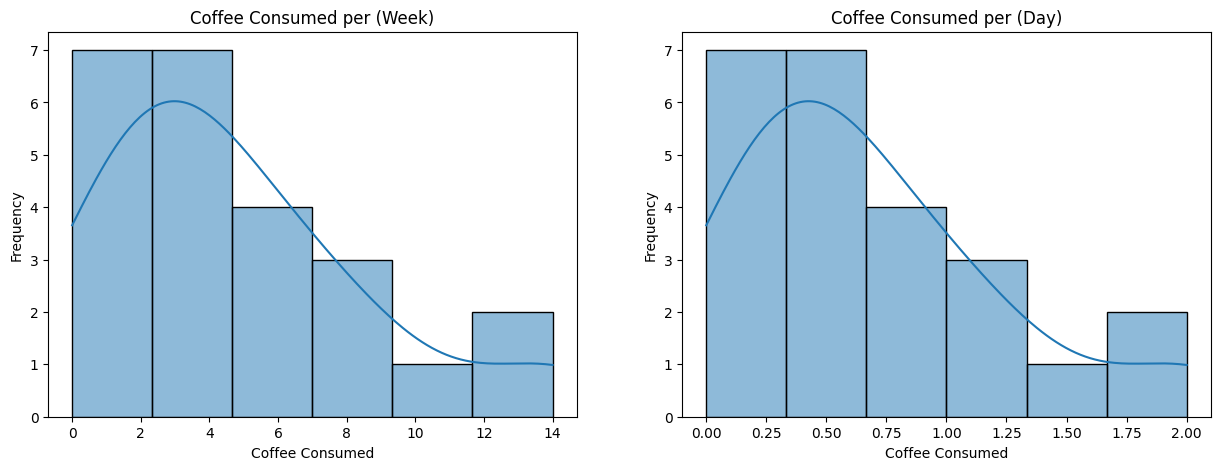

In [12]:
ccpw = df['Coffee Consumed per Week']
ccpd = df['Coffee Consumed per Week'] / 7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ccpw_hist = sns.histplot(ax=ax1, data=ccpw.to_numpy(), kde=True)
ccpw_hist.set(xlabel="Coffee Consumed", ylabel="Frequency",
              title="Coffee Consumed per (Week)")
ccpd_hist = sns.histplot(ax=ax2, data=ccpd.to_numpy(), kde=True)
ccpd_hist.set(xlabel="Coffee Consumed", ylabel="Frequency",
              title="Coffee Consumed per (Day)")

plt.show()